In [58]:
# CS440 Midterm Project

import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [59]:
# preprocess data
raw = pd.read_csv('avocado.csv')

# drop useless index column
raw = raw.drop(columns=['Unnamed: 0'])

# sort by date
raw = raw.sort_values('Date')

# turn type into 0 = conventional 1 = organic
raw["type"].replace({"conventional": 0, "organic": 1}, inplace=True)

# group by region; index resets for each region
raw_by_region = raw.groupby('region', as_index=False)

In [60]:
# testing
raw.head(10)
#raw_by_region.get_group('Albany').head()



,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,1,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,1,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,1,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,0,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,1,2015,Boise
2807,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,0,2015,WestTexNewMexico
1195,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,0,2015,LosAngeles
10269,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,1,2015,LasVegas
103,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,0,2015,Atlanta
1143,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,0,2015,LasVegas


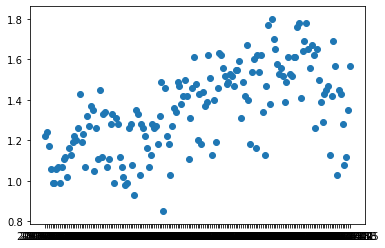

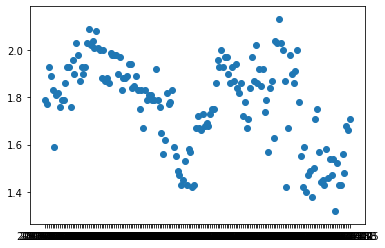

In [63]:
# make some basic plots to explore data
al

albany_by_type = raw_by_region.get_group('Albany').groupby('type')
conventional = albany_by_type.get_group(0)

plt.scatter(conventional.Date, conventional.AveragePrice)
plt.show()

organic = albany_by_type.get_group(1)
plt.scatter(organic.Date, organic.AveragePrice)
plt.show()
